1. Reading, Understanding and Visualizing Data
2. Prepare the data for modeling(spliting, rescaling,)
3. Train the model
4. Residual analysis
5. Prediction and Evaulation of Training dataset

# Remove constant while calculating VIF

# RFE VIF p-Value

# 1. Reading and Understanding Data

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data quality checks, if any, are performed, and all data quality issues are addressed in the right way. 
Explanations for data quality issues are clearly mentioned in comments.
Categorical variables are handled appropriately.
Dummy variables are created properly wherever applicable.
New metrics are derived if applicable and are used for analysis and modelling.
The data is converted to a clean format suitable for analysis.

In [184]:
bike = pd.read_csv(r"C:\Users\rajes\OneDrive\Desktop\MastersIIITB\Course 2 ML\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
bike.shape

(730, 16)

In [186]:
bike.info()

# No major imputation required based on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [187]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping un-required columns

As per the businesss directive, causal and registered columns do not make any impact. These two columns can be dropped from dataset

In [188]:
bike = bike.drop(columns=['casual', 'registered'])


In [189]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [190]:
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')  # Converting 'dteday' to datetime format
bike.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True) #renaming to apporpriate column names
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


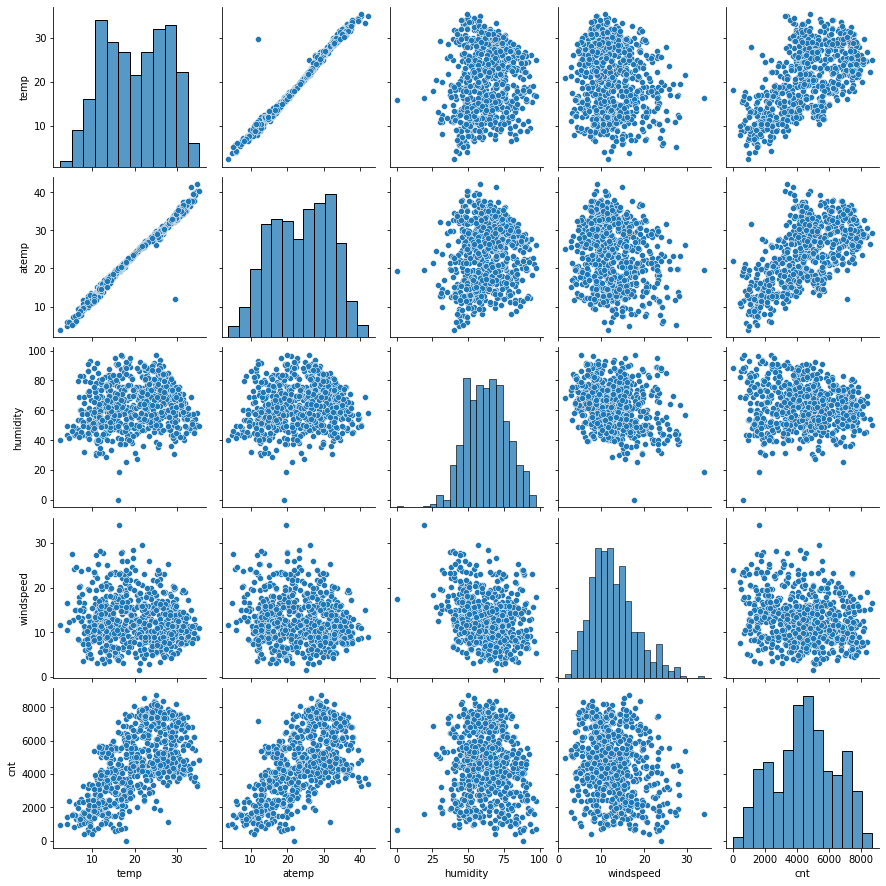

In [191]:
sns.pairplot(bike, vars=['temp','atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

In [192]:
# Convert 'season' and 'weathersit' to categorical strings
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weather_mapping = {1: 'clear', 2: 'mist_cloudy', 3: 'light_snow_rain', 4: 'heavy_rain_ice'}

bike['season'] = bike['season'].map(season_mapping)
bike['weathersit'] = bike['weathersit'].map(weather_mapping)

bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,2018-01-01,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


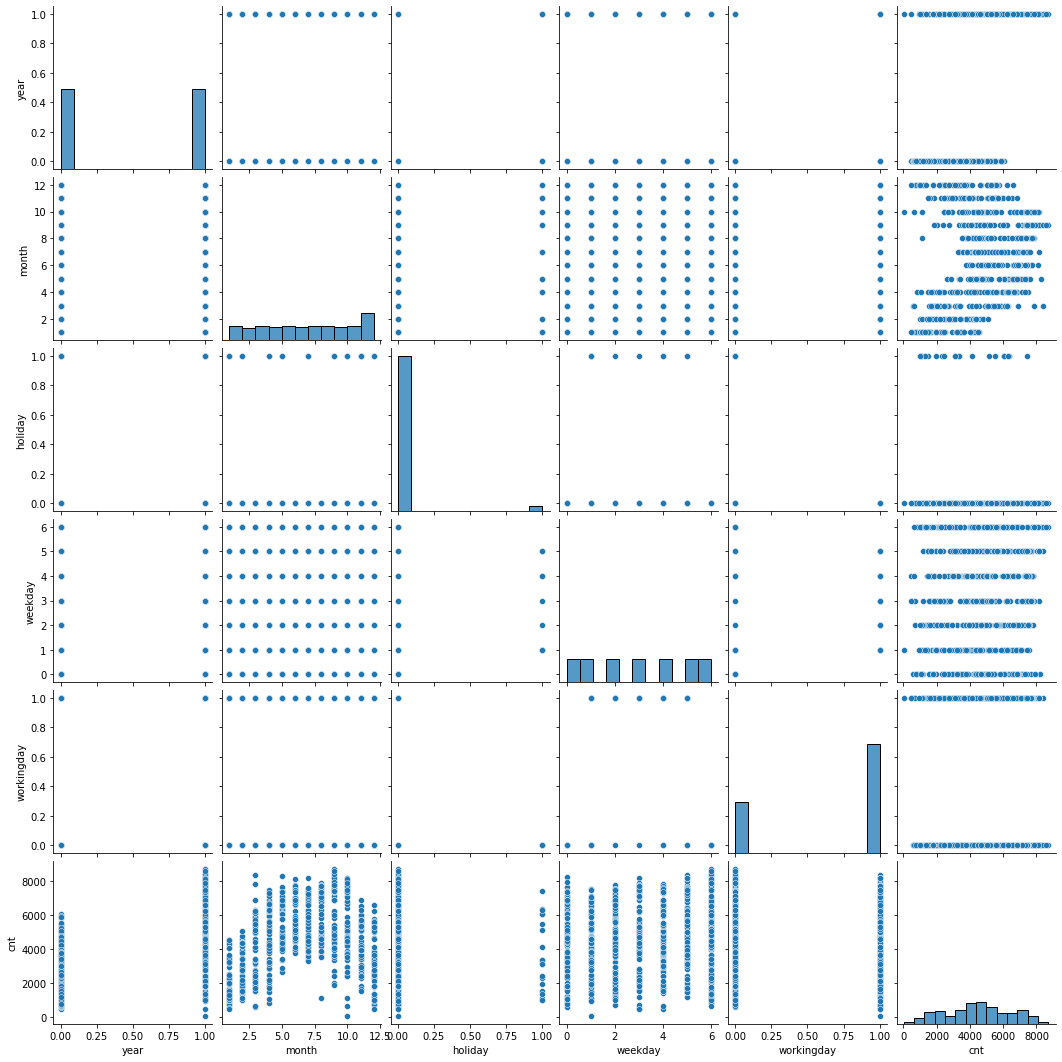

In [193]:
sns.pairplot(bike, vars=['year','month','holiday','weekday','workingday', 'cnt'])
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

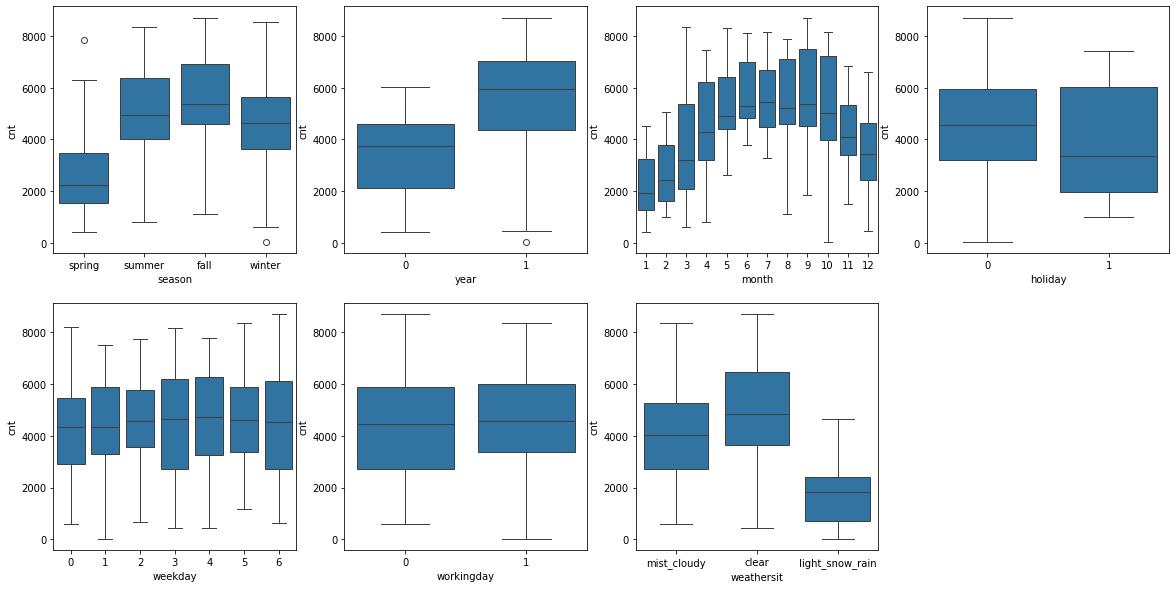

In [194]:
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y ='cnt', data=bike)
plt.subplot(2, 4, 2)
sns.boxplot(x='year', y ='cnt', data=bike)
plt.subplot(2, 4, 3)
sns.boxplot(x='month', y ='cnt', data=bike)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y ='cnt', data=bike)
plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y ='cnt', data=bike)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y ='cnt', data=bike)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y ='cnt', data=bike)


In [195]:
# Applying one-hot encoding to 'season' and 'weathersit' columns in the 'bike' DataFrame.
# This creates new binary columns for each category in these two columns.
# 'drop_first=True' is used to avoid multicollinearity by dropping the

bike = pd.get_dummies(bike, columns=['season', 'weathersit'], drop_first=True)

columns_to_convert = ['season_spring', 'season_summer', 'season_winter', 
                      'weathersit_light_snow_rain', 'weathersit_mist_cloudy']

bike[columns_to_convert] = bike[columns_to_convert].apply(lambda x: x.astype(int))

bike.head()

,instant,dteday,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_mist_cloudy
0,1,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,3,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,4,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,5,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [196]:
# Mapping for 'weekday' field
weekday_mapping = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}

# Apply the mapping to the 'weekday' column
bike['weekday'] = bike['weekday'].map(weekday_mapping)

# Generate dummy variables for the 'weekday' column
bike = pd.get_dummies(bike, columns=['weekday'], drop_first=True)

columns_to_convert = ['weekday_Mon', 'weekday_Sat', 'weekday_Sun', 
                      'weekday_Tues', 'weekday_Wed']

bike[columns_to_convert] = bike[columns_to_convert].apply(lambda x: x.astype(int))

# Verify the changes
bike.head()


,instant,dteday,year,month,holiday,workingday,temp,atemp,humidity,windspeed,...,season_summer,season_winter,weathersit_light_snow_rain,weathersit_mist_cloudy,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,1,2018-01-01,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,1,0,0,False,0,0
1,2,2018-01-02,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,0,1,0,0,0,False,1,0
2,3,2018-01-03,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,False,0,1
3,4,2018-01-04,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,True,0,0
4,5,2018-01-05,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,False,0,0


In [197]:
bike.head()

,instant,dteday,year,month,holiday,workingday,temp,atemp,humidity,windspeed,...,season_summer,season_winter,weathersit_light_snow_rain,weathersit_mist_cloudy,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,1,2018-01-01,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,1,0,0,False,0,0
1,2,2018-01-02,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,0,1,0,0,0,False,1,0
2,3,2018-01-03,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,False,0,1
3,4,2018-01-04,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,True,0,0
4,5,2018-01-05,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,False,0,0


In [198]:
# Mapping for 'month' field
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Apply the mapping to the 'month' column
bike['month'] = bike['month'].map(month_mapping)

# Generate dummy variables for the 'month' column
bike = pd.get_dummies(bike, columns=['month'], drop_first=True)

columns_to_convert = ['month_Jan', 'month_Feb', 'month_Mar', 'month_May', 'month_Jun', 'month_Jul',
                      'month_Aug', 'month_Sep', 'month_Oct', 'month_Nov', 'month_Dec']

bike[columns_to_convert] = bike[columns_to_convert].apply(lambda x: x.astype(int))

# Verify the changes
bike.head()


,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [199]:
bike.columns


Index(['instant', 'dteday', 'year', 'holiday', 'workingday', 'temp', 'atemp',
       'humidity', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_light_snow_rain', 'weathersit_mist_cloudy',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')